In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
# from sklearn.externals import joblib
import joblib
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
import skimage
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (100, 100)


In [9]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train', 'seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        print(images.shape)
        output.append((images, labels))

    return output

In [10]:
(train_images, train_labels), (test_images, test_labels) = load_data()

train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


  3%|██▎                                                                            | 64/2191 [00:00<00:03, 635.63it/s]

Loading seg_train


  0%|▏                                                                                 | 1/437 [00:00<00:46,  9.38it/s]

(14034, 100, 100, 3)
Loading seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 708.01it/s]


(3000, 100, 100, 3)


In [11]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (100, 100)


In [14]:
from PIL import Image

def compute_average_image_color(img):
   # width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0
    

    count = 0
    for file in tqdm(os.listdir(img)):
        loc = Image.open(os.path.join(img,file))
        width, height = loc.size
        for x in range(0, width):
            for y in range(0, height):
                r, g, b = loc.getpixel((x,y))
                r_total += r
                g_total += g
                b_total += b
                
    c =140340000
    return (r_total/c, g_total/c, b_total/c)

forest = 'seg_train/forest'
#img = img.resize((50,50))  # Small optimization
average_color_forest = compute_average_image_color(forest)
print(average_color_forest)

glacier = 'seg_train/glacier'
#img = img.resize((50,50))  # Small optimization
average_color_glacier = compute_average_image_color(glacier)
print(average_color_glacier)


buildings = 'seg_train/buildings'
#img = img.resize((50,50))  # Small optimization
average_color_buildings = compute_average_image_color(buildings)
print(average_color_buildings)

mountain = 'seg_train/mountain'
#img = img.resize((50,50))  # Small optimization
average_color_mountain = compute_average_image_color(mountain)
print(average_color_mountain)

street = 'seg_train/street'
#img = img.resize((50,50))  # Small optimization
average_color_street = compute_average_image_color(street)
print(average_color_street)

sea = 'seg_train/sea'
#img = img.resize((50,50))  # Small optimization
average_color_sea = compute_average_image_color(sea)
print(average_color_sea)

  0%|▏                                                                                | 4/2404 [00:00<01:01, 39.27it/s]

(30.47355997577312, 33.04300612797492, 22.507051809890267)


  0%|                                                                                 | 3/2191 [00:00<01:14, 29.20it/s]

(46.397960218041895, 52.19612250961949, 57.14842568049024)


  0%|▏                                                                                | 4/2512 [00:00<01:04, 39.00it/s]

(40.33540430383355, 41.10398794356563, 41.54086184979336)


  0%|▏                                                                                | 4/2382 [00:00<01:03, 37.38it/s]

(45.143694976485676, 49.55029859626621, 52.28102222459741)


  0%|▏                                                                                | 4/2274 [00:00<00:57, 39.64it/s]

(41.730623200798064, 40.401061016103746, 39.036230312099185)


100%|██████████████████████████████████████████████████████████████████████████████| 2274/2274 [01:00<00:00, 37.56it/s]

(42.59208175146074, 46.02569557503207, 47.723552037907936)


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

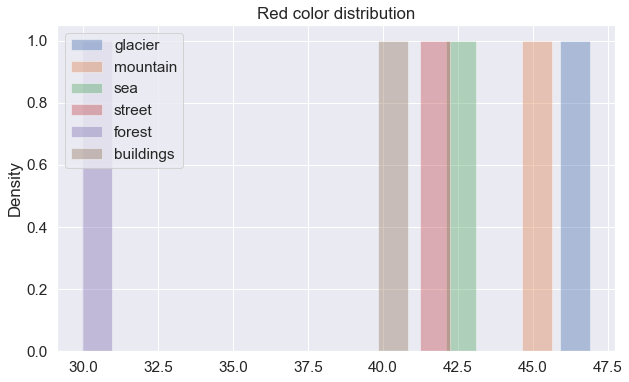

In [15]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(average_color_glacier[0], label="glacier")
sns.distplot(average_color_mountain[0],label="mountain")
sns.distplot(average_color_sea[0], label="sea")
sns.distplot(average_color_street[0], label="street")
sns.distplot(average_color_forest[0], label="forest")
sns.distplot(average_color_buildings[0], label="buildings")
plt.title("Red color distribution")
plt.legend()




C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

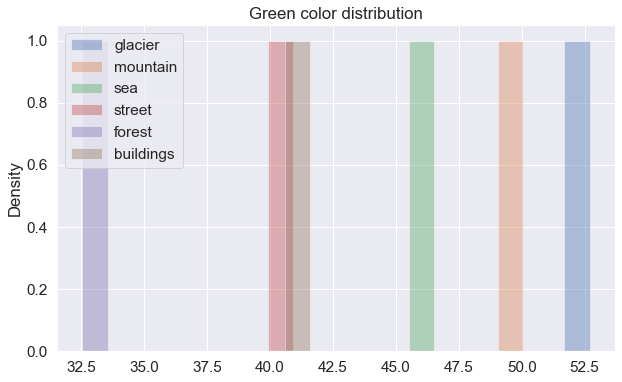

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(average_color_glacier[1], label="glacier")
sns.distplot(average_color_mountain[1],label="mountain")
sns.distplot(average_color_sea[1], label="sea")
sns.distplot(average_color_street[1], label="street")
sns.distplot(average_color_forest[1], label="forest")
sns.distplot(average_color_buildings[1], label="buildings")
plt.title("Green color distribution")
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

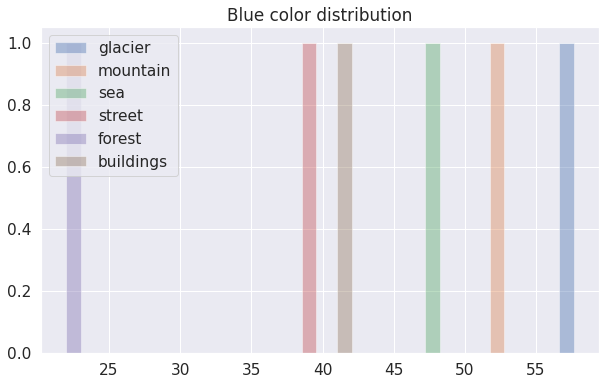

In [19]:


plt.figure(figsize=(10,6))
sns.distplot(average_color_glacier[2], label="glacier")
sns.distplot(average_color_mountain[2],label="mountain")
sns.distplot(average_color_sea[2], label="sea")
sns.distplot(average_color_street[2], label="street")
sns.distplot(average_color_forest[2], label="forest")
sns.distplot(average_color_buildings[2], label="buildings")
plt.title("Blue color distribution")
plt.legend()


No handles with labels found to put in legend.


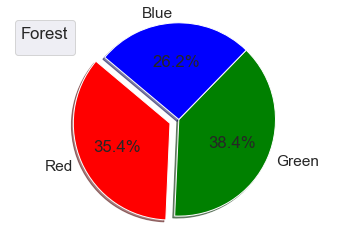

No handles with labels found to put in legend.


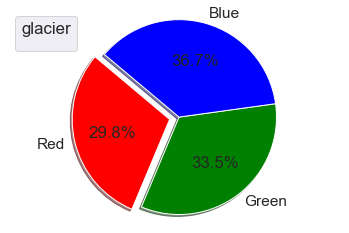

No handles with labels found to put in legend.


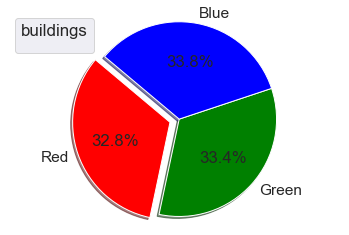

No handles with labels found to put in legend.


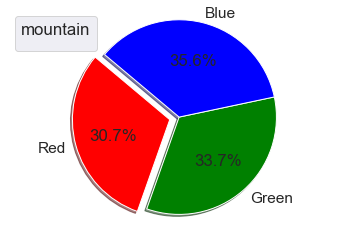

No handles with labels found to put in legend.


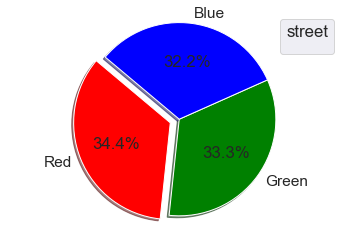

No handles with labels found to put in legend.


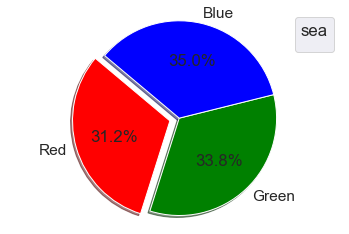

In [17]:
labels = 'Red', 'Green' , 'Blue'
colors = ['Red', 'Green', 'Blue' ]
explode = (0.1, 0, 0)  # explode 1st slice



# Plot
plt.legend(title="Forest")
plt.pie(average_color_forest, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

plt.legend(title="glacier")
plt.pie(average_color_glacier, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

plt.legend(title="buildings")
plt.pie(average_color_buildings, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

plt.legend(title="mountain")
plt.pie(average_color_mountain, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

plt.legend(title="street")
plt.pie(average_color_street, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

plt.legend(title="sea")
plt.pie(average_color_sea, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



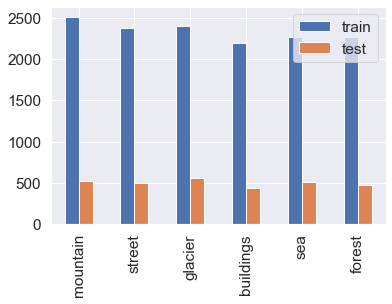

In [18]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()


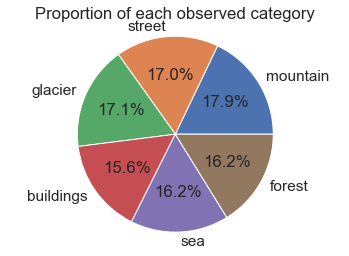

In [19]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [20]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [21]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

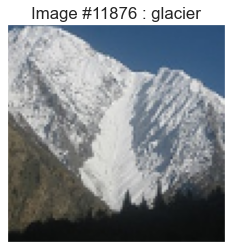

In [22]:
display_random_image(class_names, train_images, train_labels)


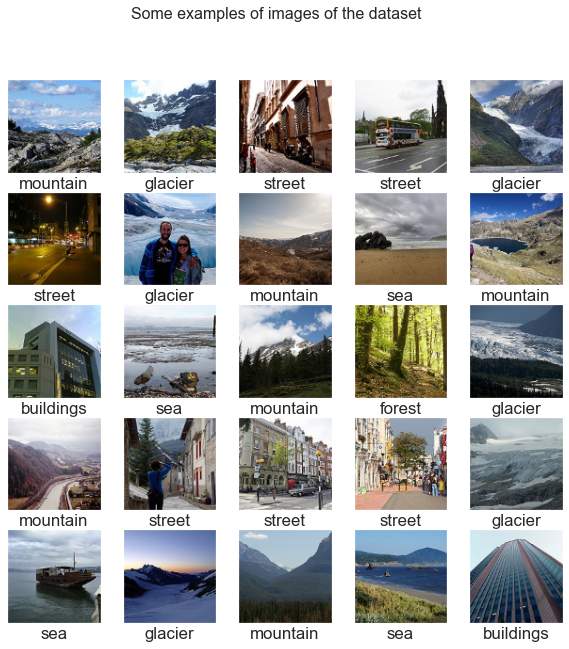

In [23]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)